# <div align="center"><b> Проект: Анализ продаж компьютерных игр  </b></div>

**Описание проекта:**  
  
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Выполнение проекта планирую в несколько этапов:**

- Загрузка данных
- Изучение общей информации
- Предобработка данных
- Исследовательский анализ данных
- Составим портрет пользователя каждого региона
- Проверка гипотез
- Общий вывод

***Импортируем необходимые библиотеки***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

###  Загрузка данных

***Загружаем датасет и выводим первые 20 строк на экран***

In [2]:
games = pd.read_csv('/datasets/games.csv')
games.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Изучение общей информации

In [3]:
shape_table = games.shape #посмотрим размер таблицы
print('Размер таблицы:', shape_table)

Размер таблицы: (16715, 11)


***В таблице у нас 16715 строк и 11 столбцов***

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


***Количество значений в столбцах разное, скорей всего присутствуют пропуски. Наименования столбцев следует привести к нижнему регистру. По типу данных, год выпуска('year_of_release) думаю нужно перевести к целым числам, и столбец  'user_score', скорей всего должен быть float64, а видимо из-за пропусков стоит тип данных object.***

### Предобработка данных

#### Приведем названия стобцов к нижнему регистру

In [5]:
games.columns = map(str.lower, games.columns) #переведем все названия столбцов к нижнему регистру
games.info() #проверим изменения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Поиск и устранение пропущенных значений

In [6]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

***Видим, что в 5-ти стобцах имеются пропущенные значения, начнем разбираться со столбцов 'name' и 'genre'***

In [7]:
games[games.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


***Здесь видим, что в столбцах 'name' и 'genre' на 2х строках идут пропуски, да и вообще в этих строках много пропусков, так что можно их просто удалить***

In [8]:
games = games.dropna(subset=['name', 'genre'])
games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

***В столбцах 'name' и 'genre' удалили пропуски, далее смотрим 'year_of_release'***

In [9]:
games[games.year_of_release.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


***В 269 строках содержутся пропуски в столбце 'year_of_release', посчитаем какой процент занимает от всего датасета***

In [10]:
games['year_of_release'].isna().mean()*100

1.6095255190570215

***Получается, что пропуски в столбце 'year_of_release' занимают всего 1.6% от всего датасета, можно просто удалить, так как их мало и они не повлияют на дальнейший анализ.***  
***Медианой или средним заполнять здесь неправильно, так как игры никак не связяны между собой, да и дата выхода обычно на всех платформах различается, особенно между игровыми приставками и ПК***

In [11]:
games = games.dropna(subset=['year_of_release'])
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

***Теперь разбираемя с 'critic_score'***

In [12]:
games[games.critic_score.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


***Здесь очень много пропусков, находятся в 8461 строке - это около половины всего датасета.***  
***Пропуски здесь скорей всего из-за того, что не всем играм успевают выставить оценку, либо просто не все игры оценивают.***  
***Медианой и средним здесь также нецелесообразно заполнять, так как каждая игра индивидуальна и имееют свою оценку, причем даже в одной серии игр(несколько частей игры) могут быть разные оценки. Так что я думаю заменить пропуски на заглушку -1***

In [13]:
games['critic_score'] = games['critic_score'].fillna(-1)
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6605
rating             6676
dtype: int64

***Теперь смотрим 'user_score'***

In [14]:
games[games.user_score.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,-1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,NaN,NaN


In [15]:
games['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.9       2
1.9       2
9.6       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

***Здесь видим пропуски в 6605 строках и еще есть значение tbd в 2376 строках. Нашел информацию в интернете, tbd расшифровывается, как To Be Determined, то есть "Будет определено" - соответственно эти строки также будем относить к пропускам.***  
***Итого получается в 8981 строках пропуски - это также много. Будем также заполнять заглушкой -1***

In [16]:
games['user_score'] = games['user_score'].fillna(-1)
games.loc[games['user_score'] == 'tbd', 'user_score'] = '-1'
games['user_score'].value_counts()

-1     6605
-1     2376
7.8     322
8       285
8.2     276
       ... 
0.9       2
9.6       2
0.6       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

In [17]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

In [18]:
display(games.query('name == "Need for Speed: Most Wanted"')) #пример

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,-1.0,-1,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,-1.0,-1,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,-1.0,-1,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


***Выше привел пример, как на основе одной игры выставлялись разные оценки критиков и пользователей, также и года выпуска здесь различаются по платформам. Так что, вариант заполнения заглушкой, считаю самым оптимальным для дальнейшего анализа.***

***Остался столбец 'rating'***

***Нашел в википедии данные о Rating — рейтинг от организации ESRB:***  
 - «EC» («Early childhood») — «Для детей младшего возраста»
 - «E» («Everyone») — «Для всех» -  {Первоначально "K-A" ("Kids to Adults")}
 - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
 - «T» («Teen») — «Подросткам»
 - «M» («Mature») — «Для взрослых»
 - «AO» («Adults Only 18+») — «Только для взрослых»
 - «RP» («Rating Pending») — «Рейтинг ожидается»  
 - «RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+
  
***Продукт отправляют в 'ESRB' на присвоение рейтинга, скорей всего в строках пропуски, из-за того, что организация 'ESRB' присваивает рейтинг играм в США и Канаде, а в таблице у нас есть и другие регионы, в которых могут быть другии организации по присвоению рейтинга.*** 

In [19]:
games['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [20]:
games[games.rating.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,-1,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,-1.0,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,-1,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,-1,NaN


***В таблице видим значение 'K-A' - это по-новому обозначают 'E', значит можно заменить, тем более их не так много.***  
***Еще можно таким же образом заменить 'AO' на 'M', всего одно значение, а почти такая же категория.***  
***И еще одно значение в 'RP' - его можно отнести к пропускам, так как рейтинг еще в режиме ожидания.***  
***Пропуски будем заполнять на 'unknown'***

In [21]:
games['rating'] = games['rating'].fillna('unknown')
games.loc[games['rating'] == 'K-A', 'rating'] = 'E'
games.loc[games['rating'] == 'AO', 'rating'] = 'M'
games.loc[games['rating'] == 'RP', 'rating'] = 'unknown'
games['rating'].value_counts()

unknown    6677
E          3924
T          2905
M          1537
E10+       1393
EC            8
Name: rating, dtype: int64

In [22]:
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

***Пропущенные значения устранили***

***Проверим дубликаты***

In [23]:
games.duplicated().sum()

0

***Проверим на неявные дубликаты***

In [24]:
games[games.duplicated(subset=['name', 'platform', 'year_of_release'], # проверку выведем сразу по трем столбцам
                       keep=False)].sort_values('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


***Явные дубликаты отсутствуют.  
В неявных видим две почти схожие строки, удалим строку с индексом 16230, так у нее где - то нулевые значения, где то такие-же, на дальнейшей анализ не повлияет.***

In [25]:
games = games.drop(index=16230).reset_index() #удалим эту строки и сделаем сброс индексов

In [26]:
games[games.duplicated(subset=['name', 'platform', 'year_of_release'], # еще раз проверим
                       keep=False)].sort_values('name')

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [27]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16443 non-null  int64  
 1   name             16443 non-null  object 
 2   platform         16443 non-null  object 
 3   year_of_release  16443 non-null  float64
 4   genre            16443 non-null  object 
 5   na_sales         16443 non-null  float64
 6   eu_sales         16443 non-null  float64
 7   jp_sales         16443 non-null  float64
 8   other_sales      16443 non-null  float64
 9   critic_score     16443 non-null  float64
 10  user_score       16443 non-null  object 
 11  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


***Неявные дубликаты также устранили***

#### Работы с типами данных

In [28]:
games.info() #выведем информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16443 non-null  int64  
 1   name             16443 non-null  object 
 2   platform         16443 non-null  object 
 3   year_of_release  16443 non-null  float64
 4   genre            16443 non-null  object 
 5   na_sales         16443 non-null  float64
 6   eu_sales         16443 non-null  float64
 7   jp_sales         16443 non-null  float64
 8   other_sales      16443 non-null  float64
 9   critic_score     16443 non-null  float64
 10  user_score       16443 non-null  object 
 11  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


***Поменяем тип только в столбце 'year_of_release' на int и в user_score на float - остальные оставим без изменения.***

In [29]:
games['year_of_release'] = games['year_of_release'].astype('int')
games['user_score'] = games['user_score'].astype('float')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16443 non-null  int64  
 1   name             16443 non-null  object 
 2   platform         16443 non-null  object 
 3   year_of_release  16443 non-null  int64  
 4   genre            16443 non-null  object 
 5   na_sales         16443 non-null  float64
 6   eu_sales         16443 non-null  float64
 7   jp_sales         16443 non-null  float64
 8   other_sales      16443 non-null  float64
 9   critic_score     16443 non-null  float64
 10  user_score       16443 non-null  float64
 11  rating           16443 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 1.5+ MB


#### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [30]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16438,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16439,16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,unknown,0.01
16440,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16441,16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,unknown,0.01


In [31]:
shape_table = games.shape #посмотрим еще раз на размер таблицы
print('Размер таблицы:', shape_table)

Размер таблицы: (16443, 13)


***На этом предобработку можно закончить, сделаем промежуточный вывод:*** 
- Привели все наименования столбцов к нижнему регистру;
- В 5ти столбцах были выявлены пропущенные значения:
    - в столбцах 'name','genre' и 'year_of_release' - пропуски удалили, так как они занимали маленький процент от всего датасета и не повлияют на дальнейший анализ;
    - в столбце 'critic_score' было найдено большое количество пропущенных значений, заменили пропуски на заглушку '-1'
    - в 'user_core',было также много пропусков, помимо пропусков было значение 'tbd'(будет определено), которое как и пропуски заменили заглушкой '-1';
    - в столбце 'rating' также не мало пропущенных значений, выяснили что: в строках пропуски, из-за того, что организация 'ESRB' присваивает рейтинг играм в США и Канаде, а в таблице у нас есть и другие регионы, в которых могут быть другии организации по присвоению рейтинга. Заменили пропуски на 'unknown';
- Явных дубликатов не найдено, в явных нашли одну строку, которую удалили;
- Поменяли тип данных только в столбце 'year_of_release' на int и в user_score на float;
- Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец 'total_score';

### Исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [33]:
games['year_of_release'].value_counts().sort_values(axis=0, ascending=False)

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

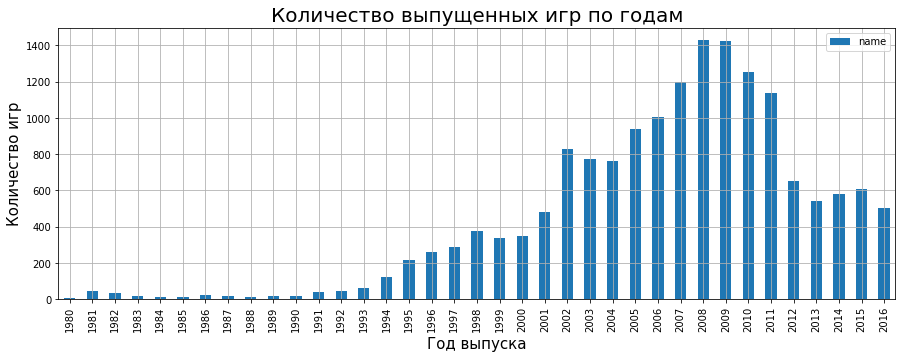

In [34]:
(games.pivot_table(index='year_of_release',
                   values='name',
                   aggfunc='count')
 .sort_values(by='year_of_release', ascending=True)
    .plot(kind='bar' , grid=True, figsize=(15, 5)))
plt.title('Количество выпущенных игр по годам', size=20)
plt.xlabel('Год выпуска', size=15)
plt.ylabel('Количество игр', size=15)
plt.show()

***с 1980 года по 1993 - было очень мало видеоигр, еще только набирали популярность, а технологий не хватало для быстрого произоводства.  
  с 1993 по 2000 года - уже видеоигры начали набирать популярность и увеличивалось создание.  
  с 2000 по 2009 года - была особая популярность видеоигр, сымый пик был в 2008-2009 годах(выпускалось 1426 игр в год).  
  с 2010 по 2016 год - начался спад по количеству видеоигр, я думаю здесь повлиял кризис 2008года, у многоих компаний по созданию видеоигр упала цена акций.  
В общем данные все важны для прослеживания динамики выпуска игр, но для анализа на 2017 год, я думаю хватит данных с 2014 по 2016гг.***

#### Как менялись продажи по платформам

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [35]:
games_platform = (games.pivot_table(index='platform',
                   values='total_sales',
                   aggfunc='sum')
 .sort_values(by='total_sales', ascending=False))
display(games_platform)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [36]:
top_platform = list(games_platform.index[:6])
top_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

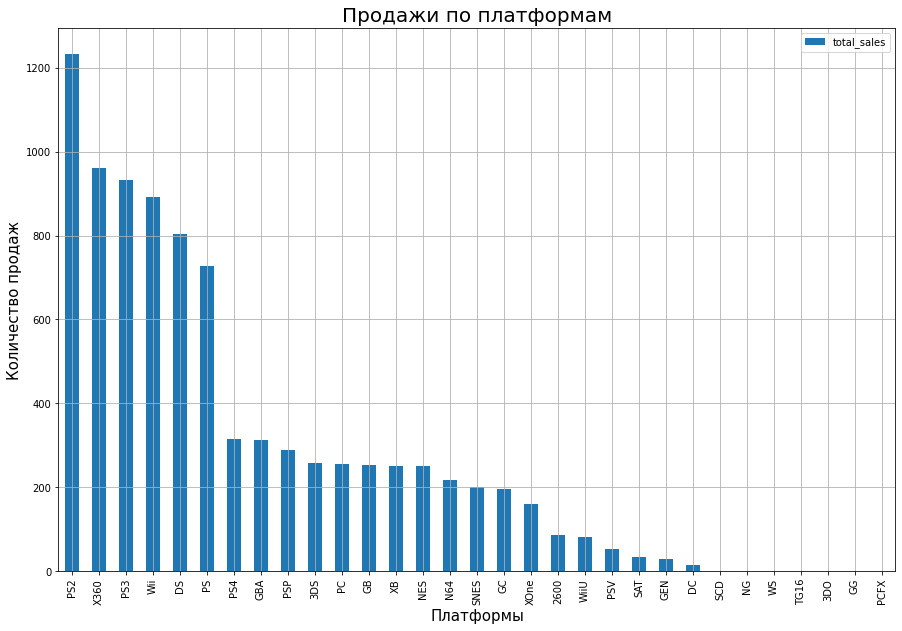

In [37]:
games_platform = (games.pivot_table(index='platform',
                   values='total_sales',
                   aggfunc='sum')
 .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar' , grid=True, figsize=(15, 10)))
plt.title('Продажи по платформам', size=20)
plt.xlabel('Платформы', size=15)
plt.ylabel('Количество продаж', size=15)
plt.show()

***Выделим 6 лидирующих платформ:***  
- PS2 - 1233.56 (является лидером продаж)
- X360 - 961.24
- PS3 - 931.34
- Wii - 891.18
- DS - 802.78
- PS - 727.58   
  
***Построим для них графики распределения по годам***

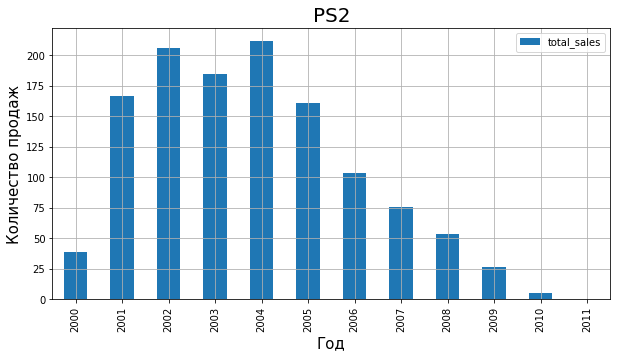

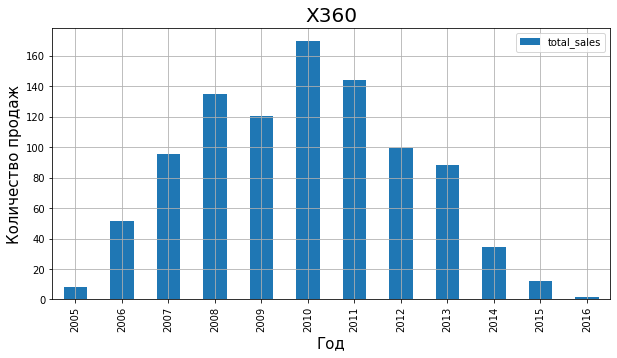

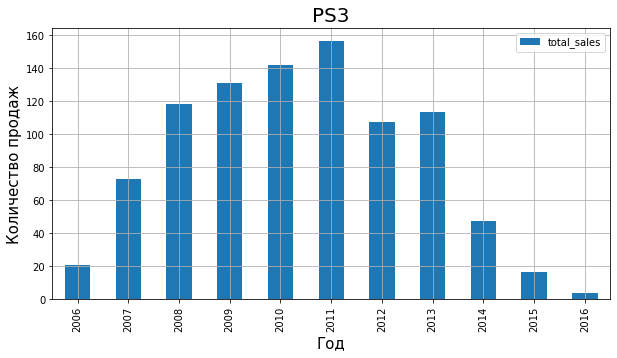

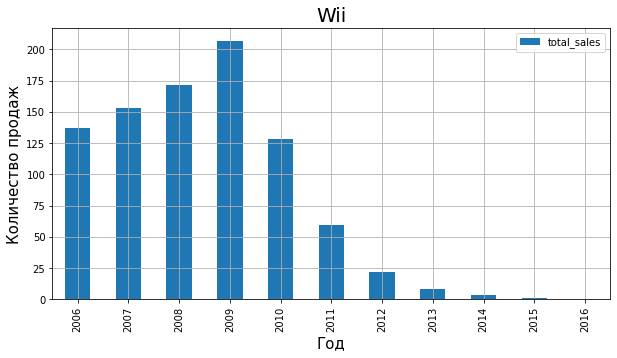

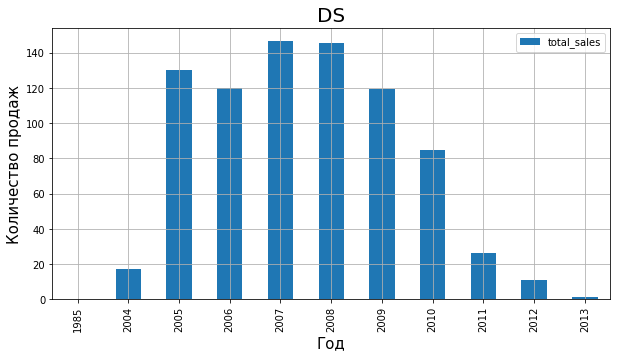

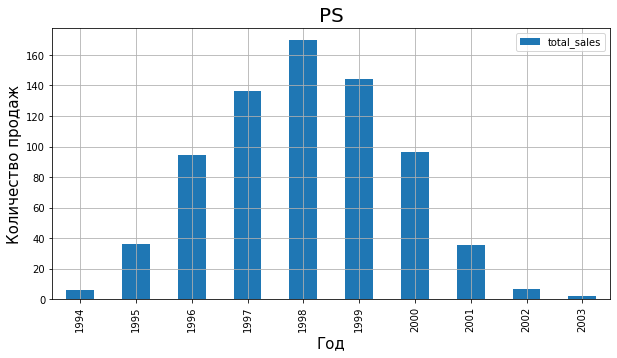

In [38]:
for platform in top_platform:
    (games
     .query('platform == @platform')
     .pivot_table(index='year_of_release',
                  values='total_sales',
                  aggfunc='sum')
     .plot(kind='bar',
           grid=True,
           figsize=(10, 5)))
    plt.title(platform, size=20)
    plt.xlabel('Год', size=15)
    plt.ylabel('Количество продаж', size=15)
    plt.show()

In [39]:
DS = games.query('platform == "DS" & year_of_release < 2004').head() # проверим даты релиза игр для DS до 2004г
DS

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1.0,-1.0,unknown,0.02


***Да дейстивительно, в одной игре указан ошибочный год релиза, поискав информацию в интернете - увидел, что данная игры вышла в 2010 году.***

In [40]:
games.loc[games['name']=='Strongest Tokyo University Shogi DS', 'year_of_release']=2010 #заменим год на 2010
games.loc[games['name']=='Strongest Tokyo University Shogi DS'] #проверим

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,15957,Strongest Tokyo University Shogi DS,DS,2010,Action,0.0,0.0,0.02,0.0,-1.0,-1.0,unknown,0.02


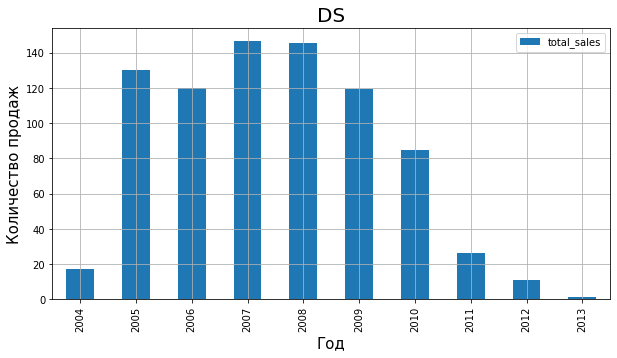

In [41]:
(games # также выведем график для визуализации
     .query('platform == "DS"')
     .pivot_table(index='year_of_release',
                  values='total_sales',
                  aggfunc='sum')
     .plot(kind='bar',
           grid=True,
           figsize=(10, 5)))
plt.title('DS', size=20)
plt.xlabel('Год', size=15)
plt.ylabel('Количество продаж', size=15)
plt.show()

***В среднем каждая платформа существует в районе 10 лет. Покажем основные пики продаж по годам:***  
- PS2 - дата выхода 2000г (пики продаж с 2001 по 2005г), спад начался с 2006 года
- X360 - дата выхода 2005г (пики продаж с 2007 по 2011г), спад начался с 2012 года
- PS3 - дата выхода 2006г (пики продаж с 2007 по 2013г), спад начался с 2014 года
- Wii - дата выхода 2006г (пики продаж с 2006 по 2009г), спад начался с 2010 года
- DS - дата выхода 2004г (пики продаж с 2005 по 2009г), спад начался с 2010 года
- PS - дата выхода 1994г (пики продаж с 1996 по 1999г), спад начался с 2000 года  
  
***После выхода платформа держит пиковую популярность в среднем 5 лет, далее начинается спад продаж. Связано это с выходом новой платформы, но также и переход происходит плавно, так как с выходном новой приставки старая начинает дешеветь, а поддержка видеоигр также остается и кто-то продолжает использовать старые приставки пока есть поддержка, некоторые уже переходят на новую платформу.***  

#### Определяем актуальный период

Возьмите данные за соответствующий актуальный период.  
Актуальный период определите самостоятельно в результате исследования предыдущих вопросов.   
Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.  
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

***Если в среднем платформы существуют около 10 лет, а пиковая популряность обычно держится в районе 5 лет, то для дальнейшего анализа предлагаю взять период с 2014 года.  
В 2013 году вышли приставки PS4 и XboxOne, думаю год на расскрутку и с 2014 года пойдут нормальные продажи, и на 2017 год в любом случае будут еще актуальны и приносить прибыль.***

In [43]:
games_new = games[games['year_of_release'] > 2013]
games_new

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
42,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,unknown,11.68
77,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16435,16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16438,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16440,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01


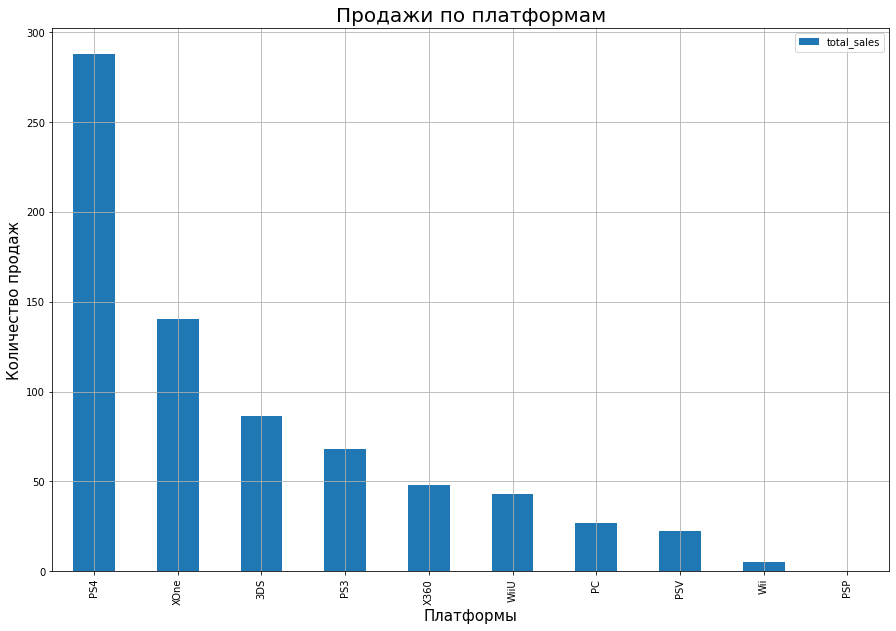

In [44]:
games_platform_new = (games_new.pivot_table(index='platform',
                   values='total_sales',
                   aggfunc='sum')
 .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar' , grid=True, figsize=(15, 10)))
plt.title('Продажи по платформам', size=20)
plt.xlabel('Платформы', size=15)
plt.ylabel('Количество продаж', size=15)
plt.show()

***Выделим наиболее популярные:***  
- PS4 - 288.15
- XOne - 140.36
- 3DS - 86.68
- PS3 - 68.18
- X360 - 48.22
- WiiU - 42.98
- PC - 27.05  

***Построим графики для этих платформ по годам***  

In [45]:
games_platform_new = (games_new.pivot_table(index='platform',
                   values='total_sales',
                   aggfunc='sum')
 .sort_values(by='total_sales', ascending=False))
display(games_platform_new)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


In [46]:
top_platform_new = list(games_platform_new.index[:7])
top_platform_new

['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC']

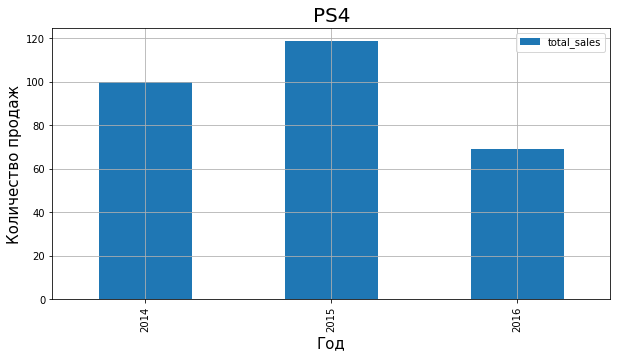

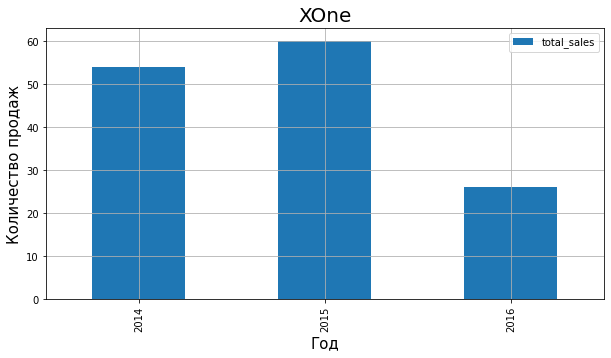

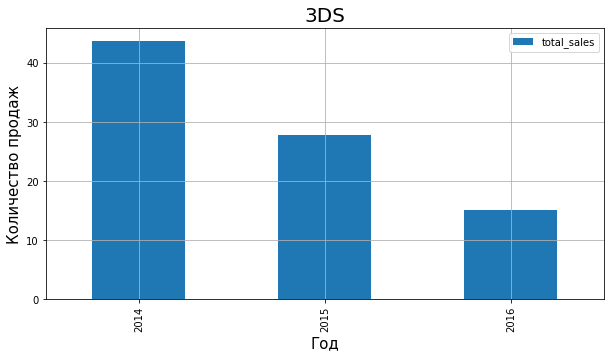

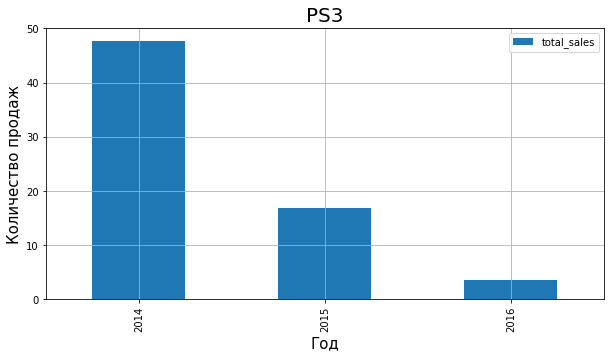

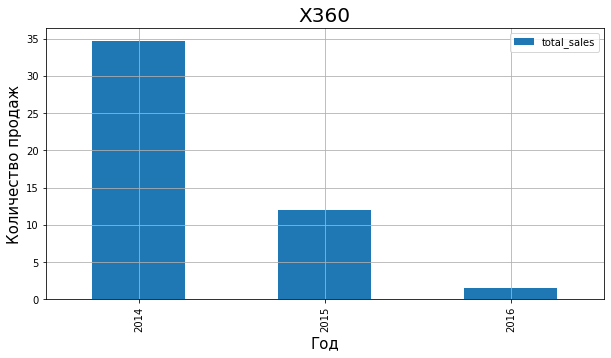

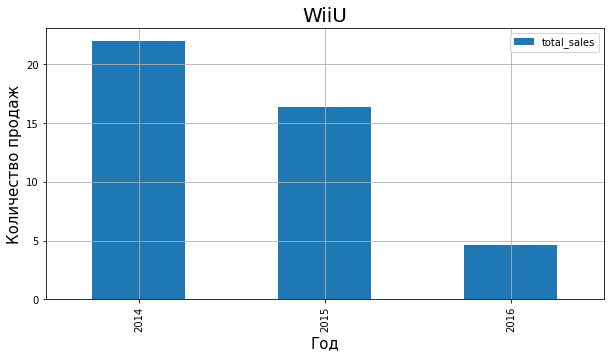

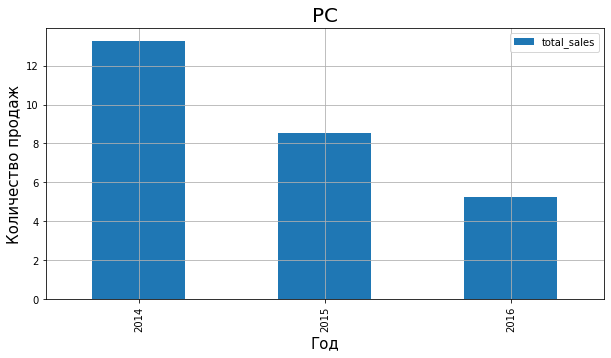

In [47]:
for platform in top_platform_new:
    (games_new
     .query('platform == @platform')
     .pivot_table(index='year_of_release',
                  values='total_sales',
                  aggfunc='sum')
     .plot(kind='bar',
           grid=True,
           figsize=(10, 5)))
    plt.title(platform, size=20)
    plt.xlabel('Год', size=15)
    plt.ylabel('Количество продаж', size=15)
    plt.show()

***Исходя из данных с 2014 года по 2016 год видим:***  
- PS4 - дата выхода 2013г (пик продаж 2015г), спад начался с 2016 года
- XOne - дата выхода 2013г (пик продаж 2015г), спад начался с 2016 года
- 3DS - дата выхода 2011г (пик продаж 2014г), спад начался с 2015 года
- PS3 - дата выхода 2006г (пик продаж 2014г), спад начался с 2015 года
- X360 - дата выхода 2005г (пик продаж 2014г), спад начался с 2015 года
- WiiU - дата выхода 2011г (пик продаж 2014г), спад начался с 2015 года
- PC - дата выхода 1941г (пики продаж 2014г), спад начался с 2015 года  

  
***Получается, что самая популярная платформа в этот период - PS4.  
PS3 и X360 уже не стоит рассматривать на 2017 год, так как они уже через пару лет полностью потреяют популярность и не будут приносить прибыль.  
WiiU - также уже не рекомендую рассматривать, так спад у них идет с 2015 года, да и даже за свои пиковые периоды продаж принесли мало прибыли.  
Соотвественно предлагаю оставить:***  
 - PS 4
 - XOne
 - 3DS
 - PC
   
***Почему PC оставляем? Да, потому что компьютеры, мало вероятно что, когда-то потеряют популярность, их всегда можно модернизировать под новые видеогры игры, путем небольших затрат. Так что, я считаю, данная платформа будет также приносить в дальнейшем прибыль.***   

#### Построим график «ящик с усами»

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

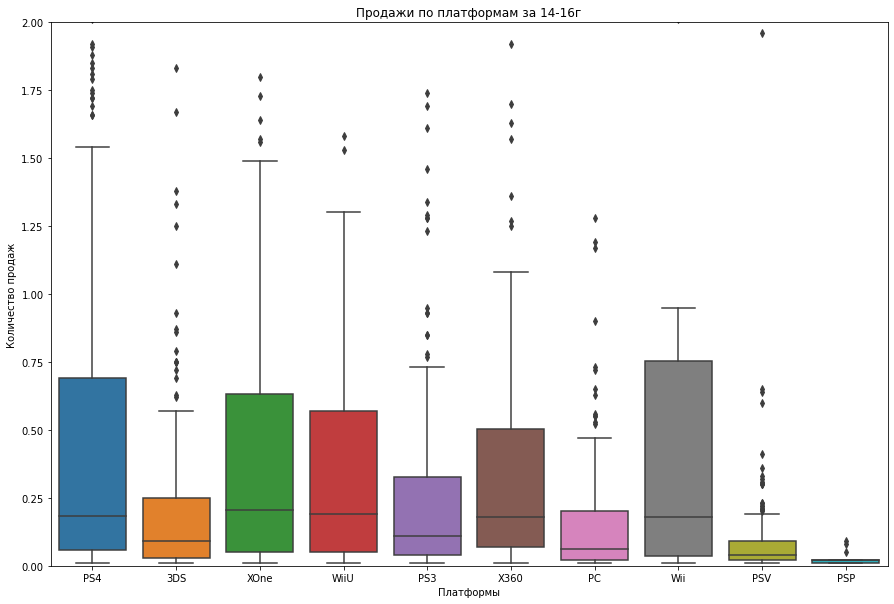

In [48]:
plt.figure(figsize=(15,10))
(sns.boxplot(data=games_new, 
             x='platform', 
             y='total_sales')
 .set(title='Продажи по платформам за 14-16г',
      xlabel='Платформы',
      ylabel='Количество продаж', ylim=(0,2)))
plt.show()

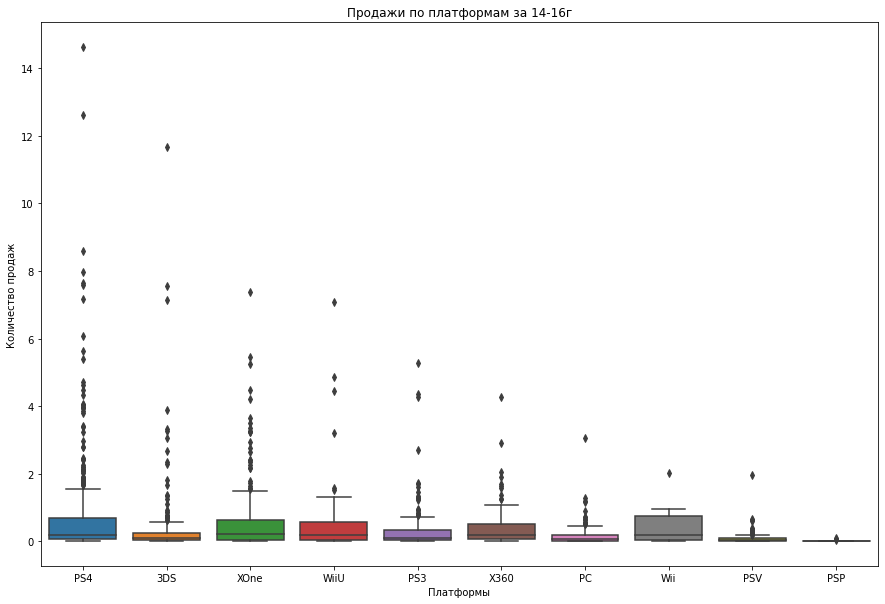

In [49]:
plt.figure(figsize=(15,10))
(sns.boxplot(data=games_new, 
             x='platform', 
             y='total_sales')
 .set(title='Продажи по платформам за 14-16г',
      xlabel='Платформы',
      ylabel='Количество продаж'))
plt.show()

***По графику видно, как PS4 преобладает по количеству продаж, а PSP наоборот самый минимум.  Также видно, что различается медианное и максимальное значение у всех платформ.  
И все таки предлагаю поменять приотритет перспективных платформ на 2017 год:***  
- PS 4
- XOne
- WiiU
- PC  
  
***Так как по этому графику видно, как WiiU обгоняет 3DS по количеству продаж.***

####  Влияние продаж внутри одной платформы

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

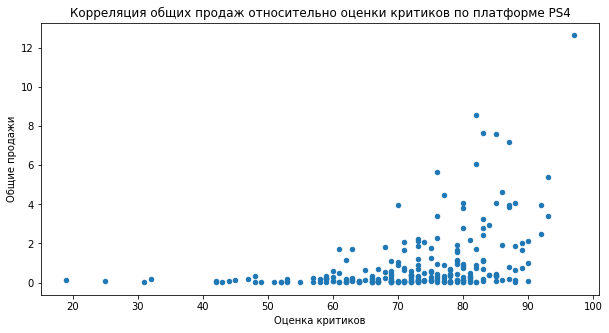

critic_score    0.402661
total_sales     1.000000
Name: total_sales, dtype: float64

In [51]:
games_ps4 = games_new.query(
    'platform == "PS4" & critic_score != -1')
games_ps4[games_ps4['critic_score'] != -1].plot(
    kind='scatter', 
    x='critic_score', 
    y='total_sales', 
    figsize = (10,5))
plt.title('Корреляция общих продаж относительно оценки критиков по платформе PS4')
plt.ylabel('Общие продажи', size=10)
plt.xlabel('Оценка критиков', size=10)
plt.show()
display(games_ps4[(games_ps4['critic_score'] != -1)]
      [['critic_score', 'total_sales']].corr()['total_sales'])

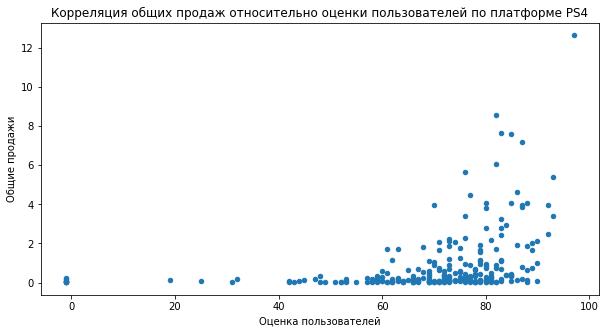

user_score    -0.040132
total_sales    1.000000
Name: total_sales, dtype: float64

In [52]:
games_ps4 = games_new.query(
    'platform == "PS4" & user_score != -1')
games_ps4[games_ps4['user_score'] != -1].plot(
    kind='scatter', 
    x='critic_score', 
    y='total_sales', 
    figsize = (10,5))
plt.title('Корреляция общих продаж относительно оценки пользователей по платформе PS4')
plt.ylabel('Общие продажи', size=10)
plt.xlabel('Оценка пользователей', size=10)
plt.show()
display(games_ps4[(games_ps4['user_score'] != -1)]
      [['user_score', 'total_sales']].corr()['total_sales'])

***Слабая корреляция относительно общих продаж прослеживается относительно оценки критиков - 40%.  
Влияния от оценки пользователей не наблюдается, больше на продажи влияет оценка критиков.***

#### Влияние продаж на других платформах

Соотнесите выводы с продажами игр на других платформах.

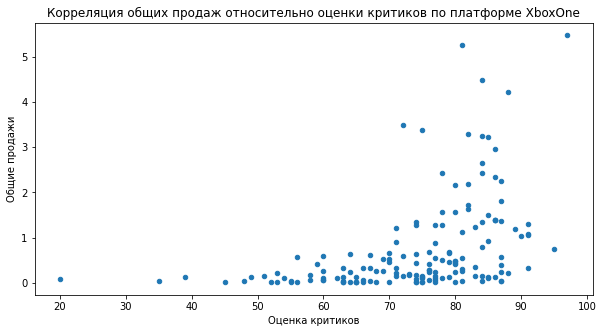

critic_score    0.428677
total_sales     1.000000
Name: total_sales, dtype: float64

In [53]:
games_xone = games_new.query(
    'platform == "XOne" & critic_score != -1')
games_xone[games_xone['critic_score'] != -1].plot(
    kind='scatter', 
    x='critic_score', 
    y='total_sales', 
    figsize = (10,5))
plt.title('Корреляция общих продаж относительно оценки критиков по платформе XboxOne')
plt.ylabel('Общие продажи', size=10)
plt.xlabel('Оценка критиков', size=10)
plt.show()
display(games_xone[(games_xone['critic_score'] != -1)]
      [['critic_score', 'total_sales']].corr()['total_sales'])

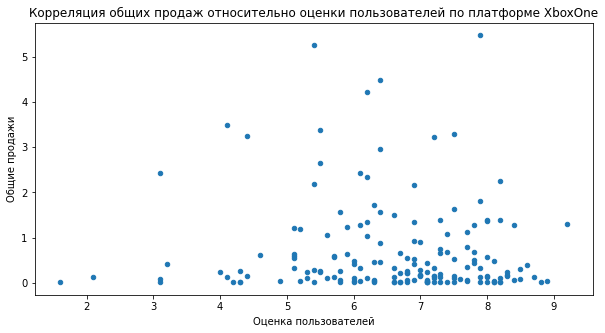

user_score    -0.070384
total_sales    1.000000
Name: total_sales, dtype: float64

In [54]:
games_xone = games_new.query(
    'platform == "XOne" & user_score != -1')
games_xone[games_xone['user_score'] != -1].plot(
    kind='scatter', 
    x='user_score', 
    y='total_sales', 
    figsize = (10,5))
plt.title('Корреляция общих продаж относительно оценки пользователей по платформе XboxOne')
plt.ylabel('Общие продажи', size=10)
plt.xlabel('Оценка пользователей', size=10)
plt.show()
display(games_xone[(games_xone['user_score'] != -1)]
      [['user_score', 'total_sales']].corr()['total_sales'])

***Слабая корреляция относительно общих продаж прослеживается относительно оценки критиков - 42%.  
Влияния от оценки пользователей не наблюдается, больше на продажи влияет оценка критиков.***

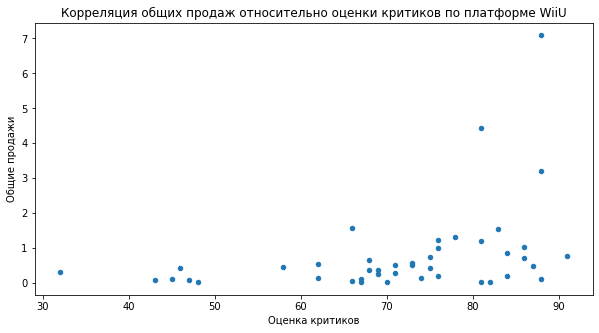

critic_score    0.370201
total_sales     1.000000
Name: total_sales, dtype: float64

In [55]:
games_wiiu = games_new.query(
    'platform == "WiiU" & critic_score != -1')
games_wiiu[games_wiiu['critic_score'] != -1].plot(
    kind='scatter', 
    x='critic_score', 
    y='total_sales', 
    figsize = (10,5))
plt.title('Корреляция общих продаж относительно оценки критиков по платформе WiiU')
plt.ylabel('Общие продажи', size=10)
plt.xlabel('Оценка критиков', size=10)
plt.show()
display(games_wiiu[(games_wiiu['critic_score'] != -1)]
      [['critic_score', 'total_sales']].corr()['total_sales'])

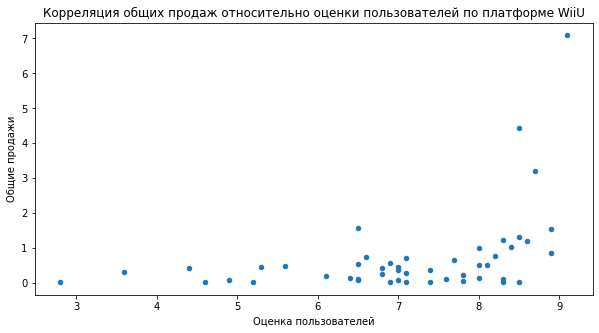

user_score     0.407926
total_sales    1.000000
Name: total_sales, dtype: float64

In [56]:
games_wiiu = games_new.query(
    'platform == "WiiU" & user_score != -1')
games_wiiu[games_wiiu['user_score'] != -1].plot(
    kind='scatter', 
    x='user_score', 
    y='total_sales', 
    figsize = (10,5))
plt.title('Корреляция общих продаж относительно оценки пользователей по платформе WiiU')
plt.ylabel('Общие продажи', size=10)
plt.xlabel('Оценка пользователей', size=10)
plt.show()
display(games_wiiu[(games_wiiu['user_score'] != -1)]
      [['user_score', 'total_sales']].corr()['total_sales'])

***У приставки WiiU прослеживется слабая корреляция и от оценки критиков 37%, и от оценки пользователей 40%.  
Значит, чем выше будут оценки пользователей и критиков, тем больше будет продаж игр для платформы WiiU.***

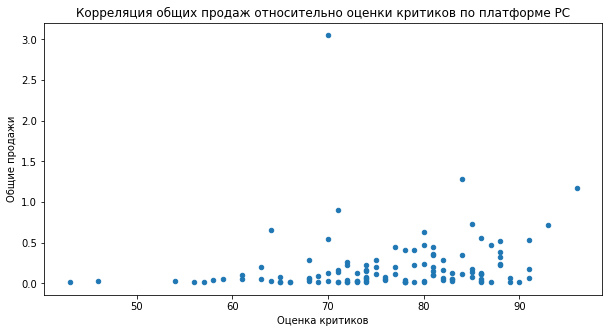

critic_score    0.174634
total_sales     1.000000
Name: total_sales, dtype: float64

In [57]:
games_pc = games_new.query(
    'platform == "PC" & critic_score != -1')
games_pc[games_pc['critic_score'] != -1].plot(
    kind='scatter', 
    x='critic_score', 
    y='total_sales', 
    figsize = (10,5))
plt.title('Корреляция общих продаж относительно оценки критиков по платформе PC')
plt.ylabel('Общие продажи', size=10)
plt.xlabel('Оценка критиков', size=10)
plt.show()
display(games_pc[(games_pc['critic_score'] != -1)]
      [['critic_score', 'total_sales']].corr()['total_sales'])

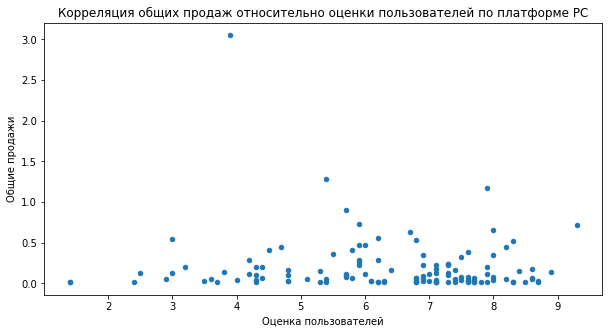

user_score    -0.071597
total_sales    1.000000
Name: total_sales, dtype: float64

In [58]:
games_pc = games_new.query(
    'platform == "PC" & user_score != -1')
games_pc[games_pc['user_score'] != -1].plot(
    kind='scatter', 
    x='user_score', 
    y='total_sales', 
    figsize = (10,5))
plt.title('Корреляция общих продаж относительно оценки пользователей по платформе PC')
plt.ylabel('Общие продажи', size=10)
plt.xlabel('Оценка пользователей', size=10)
plt.show()
display(games_pc[(games_pc['user_score'] != -1)]
      [['user_score', 'total_sales']].corr()['total_sales'])

***У ПК очень слабая корреляция от оценки критиков - 17%.  
От оценки пользователей влияния не наблюдается.***

***В итоге можно сказать, что большую часть влияния на продажи оказывают оценки критиков, чем пользователей.  
Хотя в случае с приставкой WiiU - показатели оценок примерно на одном уровне.***

#### Общее распределение игр по жанрам

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

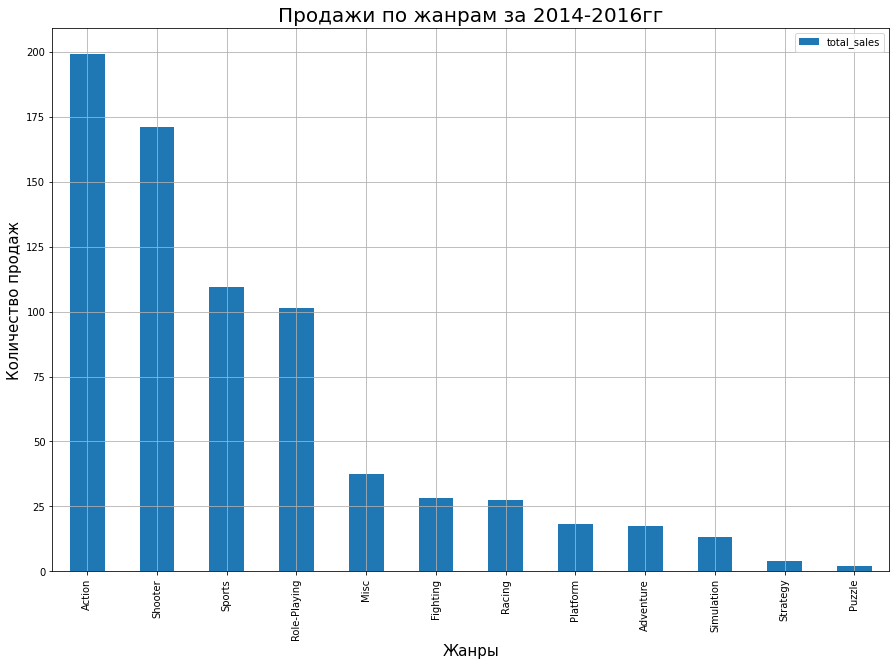

In [59]:
games_genre = (games_new.pivot_table(index='genre',
                   values='total_sales',
                   aggfunc='sum')
 .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar' , grid=True, figsize=(15, 10)))
plt.title('Продажи по жанрам за 2014-2016гг', size=20)
plt.xlabel('Жанры', size=15)
plt.ylabel('Количество продаж', size=15)
plt.show()

***По жанрам получается:***
- Первое и второе место занимают жанры 'Шутер(Shooter)' и 'Экшен(Action)' - свыше 150 миллионов проданных копий  
- Третье и четвертое место жанры 'Спорт(Sports)' и 'Ролевые игры(Role_playing)' - свыше 100 миллионов проданных копий
- Самый низкие показатели по продажам показывают жанры 'Стратегии(Strategy)' и 'Головоломки(Puzzle)' - около 5ти миллионов проданных копий  
  
***Постороим "ящик с усами", чтобы подробнее оценить продажи по жанрам.***  

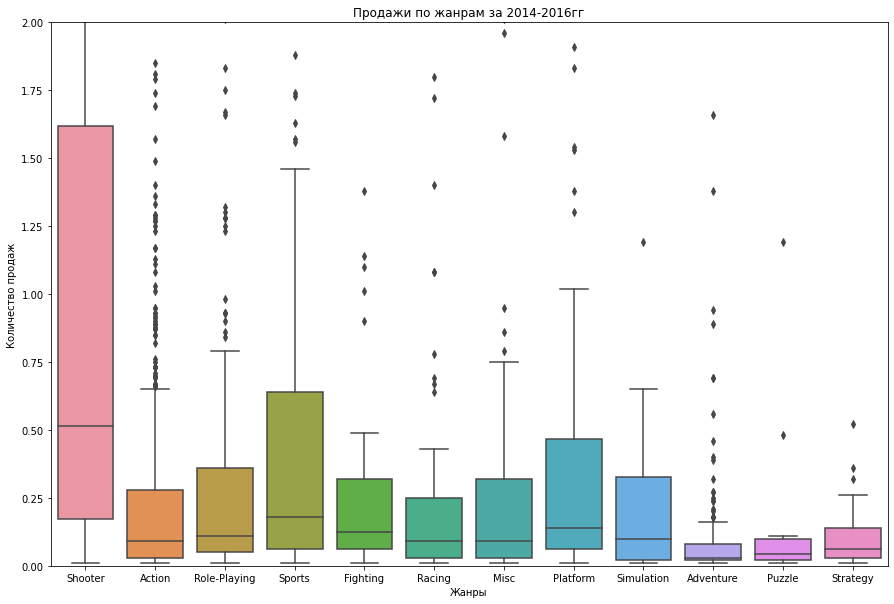

In [60]:
plt.figure(figsize=(15,10))
(sns.boxplot(data=games_new, 
             x='genre', 
             y='total_sales')
 .set(title='Продажи по жанрам за 2014-2016гг',
      xlabel='Жанры',
      ylabel='Количество продаж', ylim=(0,2)))
plt.show()

***Здесь мы видим, что явным лидером становится жанр 'Шутер(Shooter)' - его медианное значение превосходит все другие жанры.  
Данный жанр можно выделить в приоритет дальнейший продаж.  
Можно еще отметить 'Спорт(Sports)' и 'Платформенные игры(Platform)' - показывают неплохие значения.***

### Составим портрет пользователя каждого региона

***Определите для пользователя каждого региона (NA, EU, JP):***
 - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
 - Самые популярные жанры (топ-5). Поясните разницу.
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?


#### Самые популярные платформы (топ-5)

In [61]:
print('===Северная Америка===')
na_platform = games_new.groupby('platform')['na_sales'].sum()
display(na_platform.sort_values(ascending=False).head())
print('=======Европа=======')
eu_platform = games_new.groupby('platform')['eu_sales'].sum()
display(eu_platform.sort_values(ascending=False).head())
print('=======Япония=======')
jp_platform = games_new.groupby('platform')['jp_sales'].sum()
display(jp_platform.sort_values(ascending=False).head())

===Северная Америка===


platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

=======Европа=======


platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

=======Япония=======


platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

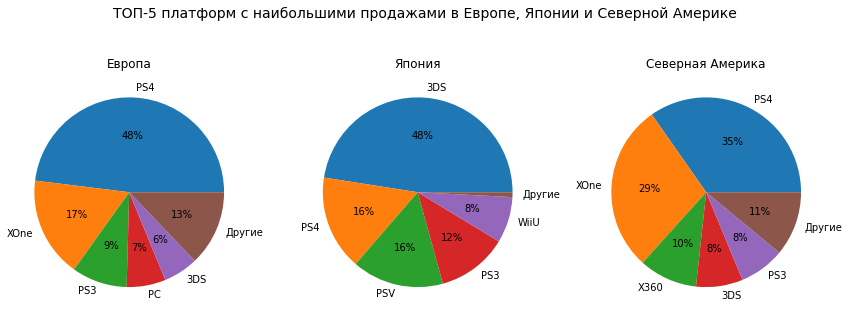

In [62]:
regions = ['Европа', 'Япония', 'Северная Америка']
platform_sales = games_new.query('year_of_release > 2013').pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
fig, ax = plt.subplots(1, len(platform_sales.columns), figsize=(12, 5))
for i in range(len(platform_sales.columns)):
    region_sales = platform_sales.iloc[:, i].sort_values(ascending=False).reset_index()
   # region_sales.loc[5] = ['Другие', platform_sales[5:][platform_sales.columns[i]].sum().round(2)]
    region_sales.loc[5] = ['Другие', region_sales.iloc[5:, 1].sum().round(2)]
    region_sales = region_sales.iloc[:6].set_index('platform')
    region_sales.iloc[:, 0].plot(
        kind='pie',
        autopct=lambda x: f'{x:.0f}%' if x > 5 else None, 
        ax=ax[i],
        title=regions[i]
    ).set(ylabel='')
plt.suptitle('ТОП-5 платформ с наибольшими продажами в Европе, Японии и Северной Америке', fontsize=14)
plt.tight_layout()
plt.show()

***Здесь мы видим:***  
- В Европе, Северной Америке - лидурует по продажам платформа PS4, на втором месте XboxOne
- В Европе - 3е место занимает PS3, 4е - PC(персональный компьютер), 5е - Nintendo3DS 
- В Северной Америке - 3е место - Xbox360, 4е - Nintendo3DS, 5е - PS3
- В Японии лидирует Nintendo3DS, 2е-3е место - PS4, PSV, 4е - PS3, 5е - WiiU
  
***В Японии в основном используют приставки собственного производства, и больше предпочитают портативные. В остальных странах лидируют PS4 и XboxOne.***

#### Самые популярные жанры (топ-5)

In [63]:
print('===Северная Америка===')
na_genre = games_new.groupby('genre')['na_sales'].sum()
display(na_genre.sort_values(ascending=False).head())
print('=======Европа=======')
eu_genre = games_new.groupby('genre')['eu_sales'].sum()
display(eu_genre.sort_values(ascending=False).head())
print('=======Япония=======')
jp_genre = games_new.groupby('genre')['jp_sales'].sum()
display(jp_genre.sort_values(ascending=False).head())

===Северная Америка===


genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

=======Европа=======


genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

=======Япония=======


genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

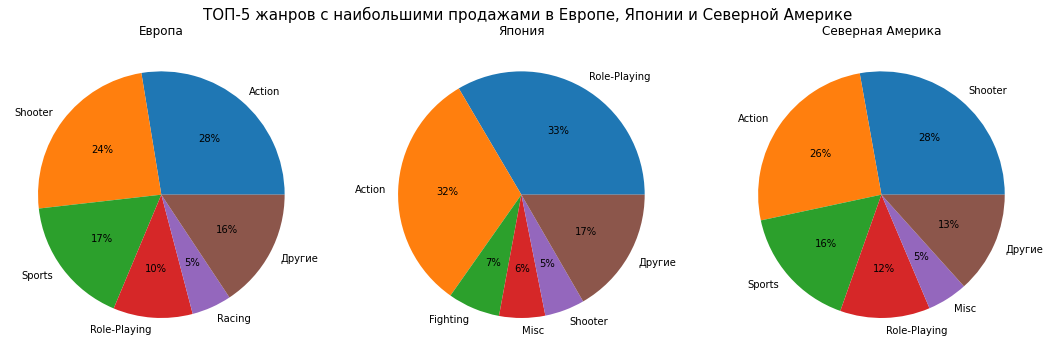

In [64]:
regions = ['Европа', 'Япония', 'Северная Америка']
genre_sales = games_new.query('year_of_release > 2013').pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
fig, ax = plt.subplots(1, len(platform_sales.columns), figsize=(15, 5))
for i in range(len(genre_sales.columns)):
    region_sales = genre_sales.iloc[:, i].sort_values(ascending=False).reset_index()
    region_sales.loc[5] = ['Другие', region_sales.iloc[5:, 1].sum().round(2)]
    region_sales = region_sales.iloc[:6].set_index('genre')
    region_sales.iloc[:, 0].plot(
        kind='pie',
        autopct=lambda x: f'{x:.0f}%' if x > 5 else None, 
        ax=ax[i],
        title=regions[i]
    ).set(ylabel='')
plt.suptitle('ТОП-5 жанров с наибольшими продажами в Европе, Японии и Северной Америке', fontsize=15)
plt.tight_layout()
plt.show()

***Здесь мы видим, что в разных странах различаются интересы по жанрам в видеоиграх:***
- В Северной Америке - на 1ом месте идут шутеры, на 2ом - экшен, 3е - спортивные игры, 4е - ролевые и 5е - онлайн-шутеры
- В Европе - на 1ом месте - экшен, 2е - шутеры, 3е - спортивные, 4е - ролевые и 5е - гоночные
- В Японии - на 1ом - ролевые, 2е - экшен, 3е - файтинг, 4е - онлайн-шутеры и 5е - шутеры  
  
***Если смотреть на все страны, то видно что жанр 'Экшен' самый популярный, в каждом регионе он занимает хорошую долю продаж. В Северной Америке и Европе 'Экшен' и 'Шутер' занимают лидирующие позиции, на 3ем месте - спортивные игры. В Японии лидирующее место занимают - 'ролевые игры и экшен'.***

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе

In [65]:
print('===Северная Америка===')
na_rating = games_new.groupby('rating')['na_sales'].sum()
display(na_rating.sort_values(ascending=False).head())
print('=======Европа=======')
eu_rating = games_new.groupby('rating')['eu_sales'].sum()
display(eu_rating.sort_values(ascending=False).head())
print('=======Япония=======')
jp_rating = games_new.groupby('rating')['jp_sales'].sum()
display(jp_rating.sort_values(ascending=False).head())

===Северная Америка===


rating
M          96.42
unknown    64.72
E          50.74
T          38.95
E10+       33.23
Name: na_sales, dtype: float64

=======Европа=======


rating
M          93.44
unknown    58.95
E          58.06
T          34.07
E10+       26.16
Name: eu_sales, dtype: float64

=======Япония=======


rating
unknown    56.90
T          14.78
E           8.94
M           8.01
E10+        4.46
Name: jp_sales, dtype: float64

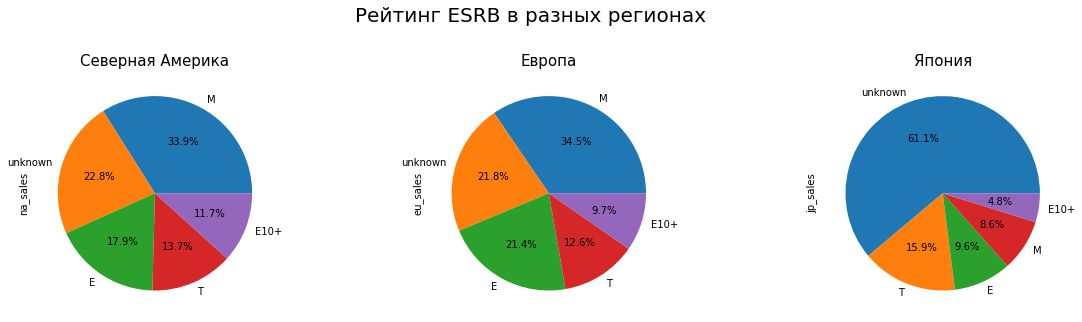

In [66]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Рейтинг ESRB в разных регионах', size=20)
ax[0].set_title('Северная Америка', size=15)
ax[1].set_title('Европа', size=15)
ax[2].set_title('Япония', size=15)

(na_rating
 .sort_values(ascending=False)
 .head()
 .plot(kind='pie',
       subplots=True,
       autopct='%1.1f%%', 
       ax=ax[0],
       figsize=(3, 3)))

(eu_rating
 .sort_values(ascending=False)
 .head()
 .plot(kind='pie',
       subplots=True,
       autopct='%1.1f%%',
       ax=ax[1],
       figsize=(3, 3)))

(jp_rating
 .sort_values(ascending=False)
 .head()
 .plot(kind='pie',
       subplots=True,
       autopct='%1.1f%%',
       ax=ax[2],
       figsize=(3, 3)))

plt.subplots_adjust(top= 0.8 )
plt.show()

***Влияние на продажи, рейтинг 'ESRB', особо не оказывает, так как распределение примерно одинаковое, за исключением Японии, большую часть графика занимают игры без рейтинга, скорей всего в Японии больше всего предпочитают играть в игры собственного производства, которые не отправляют на проверку в организацию 'ESRB'.   
Также это можно объяснить тем, что в Японии есть своя организация 'CERO'(Computer Entertainment Rating Organization), которая занимается присуждением рейтинга видеоиграм.***

***Какой же портрет пользователя мы можем составить из этих данных по регионам:***  
***Портрет пользователя для Северной Америки:*** 
- В основном предпочитают игровые приставки PS4 И XboxOne;
- В большинстве случаев это будет жанр 'шутер', не менее популярный 'Экшен', и иногда спортивный жанр;
- Игры будут с рейтингом 'M - для взрослых' - это скорей всего для жанра 'шутер', где присутствует большое количество крови с расчленением, непристойные сексуальные сцены или грубая ненормативная лексика; Менее популярны будут встречаться игры с рейтингом 'E - для всех' - содержание подходит для всех начиная с 6 лет;
  
***Портрет пользователя для Европы:***  
- В приорите у них приставка PS4
- В большинстве случаев это будет жанр 'Экшен', не менее популярный 'шутер', и иногда спортивный жанр;
- Игры будут с рейтингом 'M - для взрослых' - это скорей всего для жанра 'шутер', где присутствует большое количество крови с расчленением, непристойные сексуальные сцены или грубая ненормативная лексика; Менее популярны будут встречаться игры с рейтингом 'E - для всех' - содержание подходит для всех начиная с 6 лет;
  
***Портрет пользователя для Японии:***
- Предпочтение будут отдавать портативной приставке Nintendo 3DS
- Жанр в основном у них будет всречаться Role-Playing(ролевые игры) и иногда могут поиграть в игру с жанром 'Экшен'
- Игры у них скорей всего будут собственного производства без оценки организации 'ESRB', также будет встречаться рейтинг 'T - подросткам' -  игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики. Это больше подходит для жанра 'экшен'

### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC

In [67]:
#Посчитаем средние пользовательские рейтинги платформ XboxOne И PC
us_scor = games_new[games_new['user_score'] != -1]
print('Среднее XboxOne', us_scor.query('platform == "XOne"')['user_score'].mean())
print('Среднее PC', us_scor.query('platform == "PC"')['user_score'].mean())

Среднее XboxOne 6.594545454545456
Среднее PC 6.298360655737705


***Видим что среднее примерно одинаковое***

***Проверяем гипотезу: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые?***

H0 - Пользовательский рейтинг платформы Xbox One = Пользовательский рейтинг платформы PC  
H1 - Пользовательский рейтинг платформы Xbox One != Пользовательский рейтинг платформы PC  

уровень значимости 5%

In [69]:
x_one = us_scor.query('platform == "XOne"')['user_score']
pc = us_scor.query('platform == "PC"')['user_score']

alpha = .05
results = st.ttest_ind(x_one, 
           pc,
           equal_var=False, 
           alternative='two-sided')
print('Р-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Р-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


***Нулевую гипотезу не получилось отвергнуть, значит можем предполагать, что пользовательский рейтинг платформы Xbox One равен платформе PC.***

#### Cредние пользовательские рейтинги жанров Action и Sports 

In [70]:
#Посчитаем средние пользовательские рейтинги жанров Экшен и Спорт
print('Среднее Экшен', us_scor.query('genre == "Action"')['user_score'].mean())
print('Среднее Спорт', us_scor.query('genre == "Sports"')['user_score'].mean())

Среднее Экшен 6.760606060606061
Среднее Спорт 5.2251968503937


***Здесь заметно разницу в средних значениях***

***Проверяем гипотезу: cредние пользовательские рейтинги жанров Action и Sports разные?***

H0 - Пользовательский рейтинг жанра Action = Пользовательский рейтинг жанра Sports  
H1 - Пользовательский рейтинг жанра Action != Пользовательский рейтинг жанра Sports

уровень значимости 5%

In [71]:
action = us_scor.query('genre == "Action"')['user_score']
sports = us_scor.query('genre == "Sports"')['user_score']

alpha = .05
results = st.ttest_ind(action, 
           sports,
           equal_var=False, 
           alternative='two-sided')
print('Р-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Р-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


***Нулевую гипотезу отвергнули, значит можем предполагать, что пользовательский рейтинг жанра 'Action' не равен жанру 'Sports'.***

**Нулевая и альтернативная гипотезы**
- В первой гипотезе в условие уже стоит формулировка 'одинаковые' рейтинги платформ, значит определяется как равна и можно отнести к нулевой гипотезе Н0. Так как нам нужно проверить равенство, то в альтернативной гипотезе H1 проверим не равенство и проведем двухстороннююю проверку alternative='two-sided'. Если подтвердим нулевую гипотезу, то значит 'cредние пользовательские рейтинги платформ Xbox One и PC одинаковые'.
- Во второй гипотезе спрашивают 'cредние пользовательские рейтинги жанров Action и Sports разные?'. Если у нас нулевая гипотеза должна быть всегда равна, то если мы ее отвергнем то получим, что 'cредние пользовательские рейтинги жанров Action и Sports разные'. Так что также проведем двухстороннююю проверку alternative='two-sided'. Если отвергнем нулевую гипотезу, то значит 'cредние пользовательские рейтинги жанров Action и Sports разные'.  
  
**Какой критерий применили для проверки гипотез**
- Выборочные средние имеют нормальное распределение, больше 30 наблюдений, следовательно для проверки гипотез можно применить самый распространенный параметрический тест —  t-критерий Стьюдента. 
- Для подтверждения или опровержения необходимо установить уровень значимости для того или иного сравнения процессов, обычно его выбирают из размерного ряда 1 - 10 %, в зависимости от изученности и требовательности к данным. Обычно его устанавливают в среднем значении 5%
- Применили метод ttest_ind (о равенстве средних двух генеральных совокупностей), применили аргумент equal_var=False(полагаем, что дисперсии генеральных совокупностей не равны)

### Общий Вывод

***1. Загрузка данных***
- Импортировали необходимые библиотеки
- Загрузили таблицу с данными
  
***2. Изучение общей информации***
- Изначально размер таблицы у нас - 16715 строк и 11 столбцов
- Посмотрели общую информацию о датасете. Количество значений в столбцах разное, присутствуют пропуски. Наименования столбцев следует привести к нижнему регистру. По типу данных, год выпуска('year_of_release) нужно перевести к целым числам, и столбец 'user_score', переведем к float64.  

***3. Предобработка данных***
- Привели все наименования столбцов к нижнему регистру;
- В 5ти столбцах были выявлены пропущенные значения:
    - в столбцах 'name','genre' и 'year_of_release' - пропуски удалили, так как они занимали маленький процент от всего датасета и не повлияют на дальнейший анализ;
    - в столбце 'critic_score' было найдено большое количество пропущенных значений, заменили пропуски на заглушку '-1'
    - в 'user_core',было также много пропусков, помимо пропусков было значение 'tbd'(будет определено), которое как и пропуски заменили заглушкой '-1';
    - в столбце 'rating' также не мало пропущенных значений, выяснили что: в строках пропуски, из-за того, что организация 'ESRB' присваивает рейтинг играм в США и Канаде, а в таблице у нас есть и другие регионы, в которых могут быть другии организации по присвоению рейтинга. Заменили пропуски на 'unknown';
- Явных дубликатов не найдено, в явных нашли одну строку, которую удалили;
- Поменяли тип данных только в столбце 'year_of_release' на int и в user_score на float;
- Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец 'total_score';
  
***4. Исследовательский анализ данных***
- С 1980 года видеоигры набирали популярность и достигли высокого пика в 2008 году;
- С 2010 года начался спад продаж (повлиял кризис 2008г) и с 2012 по 2016 год примерно одинаково удерживается количество продаж;
- В среднем каждая игровая платформа пользуется спросом в течении 7-ми лет, пиковая популярность удерживается в районе 5 лет;
- Самой популярной платформой является 'Sony PlayStation' начиная с 1 первой версии и заканчивая 4ой;
- На 2 ом месте по популярности приставка от Microsoft Xbox360, далее сменили ее следующим поколением приставки - XboxOne;
- В Японии немного другая картина, там предпочитают больше портативные приставки - на 1ом месте у них идет Nintendo 3DS;
- Выяснили, что на количество продаж влияет в основном оценка критиков (исключение было только с приставкой Wii, там влияет и оценка пользователей и оценка критиков);
- Первое и второе место занимают жанры 'Шутер(Shooter)' и 'Экшен(Action)' - свыше 150 миллионов проданных копий;
- Третье и четвертое место жанры 'Спорт(Sports)' и 'Ролевые игры(Role_playing)' - свыше 100 миллионов проданных копий;
- Большая часть популярных игр будет с рейтингом 'M-для взрослых' 
  
  
***5. Составим портрет пользователя каждого региона***

**Портрет пользователя для Северной Америки:**

- В основном предпочитают игровые приставки PS4 И XboxOne;
- В большинстве случаев это будет жанр 'шутер', не менее популярный 'Экшен', и иногда спортивный жанр;
- Игры будут с рейтингом 'M - для взрослых' - это скорей всего для жанра 'шутер', где присутствует большое количество крови с расчленением, непристойные сексуальные сцены или грубая ненормативная лексика; Менее популярны будут встречаться игры с рейтингом 'E - для всех' - содержание подходит для всех начиная с 6 лет;  

**Портрет пользователя для Европы:**

- В приорите у них приставка PS4
- В большинстве случаев это будет жанр 'Экшен', не менее популярный 'шутер', и иногда спортивный жанр;
- Игры будут с рейтингом 'M - для взрослых' - это скорей всего для жанра 'шутер', где присутствует большое количество крови с расчленением, непристойные сексуальные сцены или грубая ненормативная лексика; Менее популярны будут встречаться игры с рейтингом 'E - для всех' - содержание подходит для всех начиная с 6 лет;  

**Портрет пользователя для Японии:**

- Предпочтение будут отдавать портативной приставке Nintendo 3DS
- Жанр в основном у них будет всречаться Role-Playing(ролевые игры) и иногда могут поиграть в игру с жанром 'Экшен'
- Игры у них скорей всего будут собственного производства без оценки организации 'ESRB', также будет встречаться рейтинг 'T - подросткам' - игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики. Это больше подходит для жанра 'экшен'  
  
***6. Проверка гипотез*** 
- Можем предполагать, что пользовательский рейтинг платформы Xbox One равен платформе PC. 
- Можем предполагать, что пользовательский рейтинг жанра 'Action' не равен жанру 'Sports'.  
  
**При планирование рекламного бюджета на 2017, я бы посоветовал:** 
- Для регионов Америки и Европы:
    - Стоит сделать упор на рекламирование игр для приставок PS4, XboxOne;
    - По жанрам делать упор на 'Шутеры' и 'Экшен', также не забывать про 'Спортивные игры';
    - Также будут пользоваться популярностью игры с 'ESRB' рейтингом 'M - для взрослых', либо - 'E - для всех';
    - И стоит обратить внимание на оценку критиков, чем больше будет оценок, тем больше продаж;
- Для Японии:
    - Стоит сделать упор на рекламирование игр для приставки Nintendo3DS;
    - По жанрам делать упор на 'Ролевые игры' и 'Экшен';
    - Популярно рекламировать игры собственного производства со своим критерий оценки рейтинга, из 'ESRB' рейтинга у них популярный 'T - для подростков'
    - И также подбирать игры с хорошей оценкой критиков;
